In [ ]:
import numpy as np
from keras.applications import resnet50,xception
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions



In [ ]:
model = ResNet50(weights='imagenet')

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

In [2]:
model=resnet50.ResNet50(weights='imagenet')

In [ ]:
img_path='bay.jpg'
img=image.load_img(img_path,target_size=(224,224))



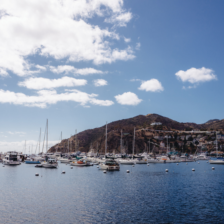

In [9]:
img

In [10]:
x = image.img_to_array(img)

In [15]:
x = np.expand_dims(x, axis=0)

In [17]:
x = preprocess_input(x)

In [19]:
preds = model.predict(x)

In [ ]:
preds

In [22]:
decode_predictions(preds, top=3)

[[('n09332890', 'lakeside', 0.37210435),
  ('n09428293', 'seashore', 0.30179685),
  ('n03216828', 'dock', 0.14380968)]]

###　The MNIST dataset comprises 60,000 training examples and 10,000 test examples of the handwritten digits 0–9, formatted as 28x28-pixel monochrome images.



In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import numpy as np
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.INFO)

# Our application logic will be added here

if __name__ == "__main__":
  tf.app.run()

In [ ]:
def cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2 and Pooling Layer #2
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Dense Layer
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits Layer
  logits = tf.layers.dense(inputs=dropout, units=10)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }

  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [ ]:
# MNIST dataset

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import numpy as np
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.INFO)

# Our application logic will be added here

if __name__ == "__main__":
  tf.app.run()

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.INFO)

In [3]:
def cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  # Reshape X to 4-D tensor: [batch_size, width, height, channels]
  # MNIST images are 28x28 pixels, and have one color channel
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  # Computes 32 features using a 5x5 filter with ReLU activation.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 28, 28, 1]
  # Output Tensor Shape: [batch_size, 28, 28, 32]
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  # First max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 28, 28, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 32]
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2
  # Computes 64 features using a 5x5 filter.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 14, 14, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 64]
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #2
  # Second max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 14, 14, 64]
  # Output Tensor Shape: [batch_size, 7, 7, 64]
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Flatten tensor into a batch of vectors
  # Input Tensor Shape: [batch_size, 7, 7, 64]
  # Output Tensor Shape: [batch_size, 7 * 7 * 64]
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])

  # Dense Layer
  # Densely connected layer with 1024 neurons
  # Input Tensor Shape: [batch_size, 7 * 7 * 64]
  # Output Tensor Shape: [batch_size, 1024]
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)

  # Add dropout operation; 0.6 probability that element will be kept
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits layer
  # Input Tensor Shape: [batch_size, 1024]
  # Output Tensor Shape: [batch_size, 10]
  logits = tf.layers.dense(inputs=dropout, units=10)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [ ]:

"""Convolutional Neural Network Estimator for MNIST, built with tf.layers."""
def main(unused_argv):
  # Load training and eval data
  mnist = tf.contrib.learn.datasets.load_dataset("mnist")
  train_data = mnist.train.images  # Returns np.array
  train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
  eval_data = mnist.test.images  # Returns np.array
  eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

  # Create the Estimator
  mnist_classifier = tf.estimator.Estimator(
      model_fn=cnn_model_fn, model_dir="/tmp/mnist_convnet_model")

  # Set up logging for predictions
  # Log the values in the "Softmax" tensor with label "probabilities"
  tensors_to_log = {"probabilities": "softmax_tensor"}
  logging_hook = tf.train.LoggingTensorHook(
      tensors=tensors_to_log, every_n_iter=50)

  # Train the model
  train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": train_data},
      y=train_labels,
      batch_size=100,
      num_epochs=None,
      shuffle=True)
  mnist_classifier.train(
      input_fn=train_input_fn,
      steps=20000,
      hooks=[logging_hook])

  # Evaluate the model and print results
  eval_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": eval_data},
      y=eval_labels,
      num_epochs=1,
      shuffle=False)
  eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
  print(eval_results)


if __name__ == "__main__":
  tf.app.run()

Extracting MNIST-data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_is_chief': True, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_master': '', '_session_config': None, '_save_checkpoints_steps': None, '_num_worker_replicas': 1, '_task_type': 'worker', '_tf_random_seed': None, '_service': None, '_keep_checkpoint_max': 5, '_model_dir': '/tmp/mnist_convnet_model', '_save_checkpoints_secs': 600, '_task_id': 0, '_save_summary_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001C6103A7A90>, '_num_ps_replicas': 0}
INFO:tensorflow:Create C

INFO:tensorflow:step = 1, loss = 2.3155
INFO:tensorflow:probabilities = [[ 0.10281035  0.11161142  0.09386075  0.09908161  0.09981126  0.09380919
   0.09713088  0.10296807  0.09894274  0.09997372]
 [ 0.10114563  0.10017688  0.10999528  0.09967262  0.09899954  0.08844588
   0.09865452  0.1053323   0.10158393  0.09599333]
 [ 0.09230451  0.10206739  0.11719956  0.10681232  0.09276577  0.09450108
   0.09629059  0.09842149  0.09283206  0.10680513]
 [ 0.10315187  0.09522615  0.11099802  0.09455658  0.09532735  0.09152871
   0.0896621   0.10500785  0.09306774  0.1214736 ]
 [ 0.08879437  0.10423943  0.09515934  0.09630182  0.10022675  0.10692157
   0.09797499  0.10073447  0.10013745  0.1095099 ]
 [ 0.0920526   0.09331661  0.1140516   0.09452478  0.09621508  0.09639803
   0.09509843  0.11108232  0.09992144  0.10733907]
 [ 0.10343468  0.0977509   0.11290226  0.09697826  0.09690968  0.10438816
   0.08189049  0.10757077  0.08972269  0.10845216]
 [ 0.09110317  0.09250435  0.12001723  0.09122656  0.

INFO:tensorflow:global_step/sec: 1.62249
INFO:tensorflow:probabilities = [[ 0.09572831  0.09797189  0.10868455  0.10415833  0.09765804  0.09483141
   0.09780012  0.11458121  0.09584973  0.09273647]
 [ 0.09108645  0.09763386  0.10563309  0.10259441  0.09958669  0.09713098
   0.09585576  0.10932024  0.10089661  0.10026185]
 [ 0.10185207  0.09350312  0.11334743  0.09368549  0.10579209  0.09163141
   0.09994818  0.10174106  0.09795573  0.10054352]
 [ 0.09470692  0.10160709  0.10338993  0.10133386  0.0963043   0.09442661
   0.10459019  0.10262704  0.09956639  0.10144752]
 [ 0.09454638  0.09835016  0.10313516  0.09676847  0.09480776  0.09681956
   0.09916902  0.10655624  0.10562836  0.10421892]
 [ 0.09906418  0.10641786  0.11393926  0.09524326  0.10139866  0.10123439
   0.09040881  0.09727331  0.0917421   0.10327808]
 [ 0.10733172  0.10185166  0.10085782  0.10214318  0.09415122  0.09976927
   0.10079142  0.09299693  0.10540576  0.09470093]
 [ 0.10848707  0.09862312  0.09846316  0.08531843  0

INFO:tensorflow:step = 101, loss = 2.29053 (61.642 sec)
INFO:tensorflow:probabilities = [[ 0.09643719  0.10492437  0.1000106   0.09949981  0.0924726   0.09568759
   0.09828517  0.09881379  0.1112064   0.10266253]
 [ 0.09546626  0.09619717  0.11095501  0.0934896   0.09990145  0.09895954
   0.0975268   0.11128506  0.10058606  0.09563318]
 [ 0.09760249  0.10507717  0.09146816  0.09952604  0.09694719  0.09763051
   0.10063572  0.0990255   0.10854618  0.10354102]
 [ 0.09655211  0.09243124  0.10201578  0.09308315  0.10851399  0.09492677
   0.10077371  0.1080697   0.09966018  0.10397333]
 [ 0.0980291   0.08934011  0.10423323  0.09884007  0.09079626  0.0957184
   0.09783111  0.11616369  0.10369027  0.1053578 ]
 [ 0.09402744  0.09444433  0.10433724  0.10381498  0.09933678  0.09766698
   0.10301214  0.1094772   0.09872496  0.0951579 ]
 [ 0.1032571   0.08717304  0.10648287  0.10222469  0.10337499  0.08517441
   0.10250603  0.10570414  0.10133998  0.1027628 ]
 [ 0.10539462  0.09042112  0.12528169 

INFO:tensorflow:global_step/sec: 1.86567
INFO:tensorflow:probabilities = [[ 0.09638187  0.09223267  0.10618985  0.09889764  0.09746262  0.09883291
   0.09683361  0.10869568  0.10213346  0.10233963]
 [ 0.09366209  0.09039055  0.11304433  0.08974191  0.11340411  0.09153966
   0.10761126  0.09745672  0.10144354  0.10170592]
 [ 0.09883673  0.08803038  0.10963143  0.08874711  0.09957165  0.09884546
   0.09426759  0.10099438  0.10780698  0.11326829]
 [ 0.0944818   0.10874194  0.10631648  0.10298682  0.09294447  0.09084927
   0.10028777  0.09514415  0.10418731  0.10406003]
 [ 0.09247648  0.08539676  0.10202911  0.1015342   0.10873175  0.0977753
   0.09748479  0.10153265  0.11481378  0.09822522]
 [ 0.09748663  0.09555122  0.1011223   0.09830296  0.09427198  0.09756692
   0.09322488  0.09992417  0.11141265  0.11113624]
 [ 0.10540008  0.0939242   0.09705222  0.10475506  0.1042231   0.0934334
   0.08995915  0.10091767  0.10409893  0.10623613]
 [ 0.10467116  0.09104594  0.11278886  0.08768995  0.0

INFO:tensorflow:step = 201, loss = 2.28087 (53.578 sec)
INFO:tensorflow:probabilities = [[ 0.10559961  0.09244751  0.10362554  0.10641536  0.0977322   0.10420809
   0.10242425  0.09180327  0.10936949  0.08637471]
 [ 0.10839777  0.08090834  0.09668964  0.099477    0.09584024  0.10274603
   0.10639028  0.10215344  0.11184602  0.09555127]
 [ 0.10983048  0.09860868  0.09991769  0.10357422  0.10533153  0.08890751
   0.09476053  0.10251378  0.0953344   0.10122112]
 [ 0.09399153  0.10755667  0.10545659  0.09982648  0.09600426  0.09282997
   0.09407213  0.10205948  0.10419219  0.10401066]
 [ 0.0913114   0.09642971  0.10534421  0.10843437  0.09843391  0.09765212
   0.10075162  0.09490438  0.10253744  0.10420092]
 [ 0.10262499  0.10176228  0.10616253  0.10128318  0.0954624   0.10479946
   0.10256887  0.09433088  0.09555768  0.09544769]
 [ 0.11832257  0.09673211  0.09337878  0.10248591  0.10229822  0.09435235
   0.09314073  0.09641718  0.10809138  0.09478083]
 [ 0.09647995  0.09525855  0.10774893

INFO:tensorflow:global_step/sec: 1.91708
INFO:tensorflow:probabilities = [[ 0.10440101  0.08863079  0.09651834  0.09418731  0.10536577  0.09977021
   0.099608    0.09024745  0.10603975  0.11523141]
 [ 0.09577456  0.07935861  0.11006112  0.109102    0.10485242  0.09369954
   0.1065748   0.10487372  0.09842604  0.09727722]
 [ 0.10882217  0.09580769  0.10781673  0.09549757  0.097955    0.09574655
   0.09309307  0.10347048  0.10278025  0.09901047]
 [ 0.10103378  0.09880099  0.10732535  0.09543592  0.08939087  0.10450647
   0.09332951  0.10394765  0.10099661  0.10523289]
 [ 0.11845202  0.08664368  0.10528152  0.09482309  0.10986241  0.08665659
   0.10600926  0.09838858  0.08891241  0.10497048]
 [ 0.09015076  0.0851556   0.10082601  0.09537474  0.10311989  0.10073835
   0.09810901  0.10511184  0.1100352   0.11137862]
 [ 0.10179483  0.09333908  0.09846323  0.09603921  0.11008807  0.10100462
   0.09844757  0.0935007   0.10277109  0.10455149]
 [ 0.09298652  0.10173261  0.10102148  0.09464838  0

INFO:tensorflow:step = 301, loss = 2.26078 (52.169 sec)
INFO:tensorflow:probabilities = [[ 0.127369    0.08335182  0.10961153  0.10775956  0.09731698  0.09197054
   0.10128906  0.10267421  0.09096348  0.08769384]
 [ 0.09312304  0.08679923  0.10561065  0.10208993  0.09614571  0.09042636
   0.09552155  0.10483355  0.11075848  0.11469143]
 [ 0.11109943  0.09367002  0.09813543  0.10870356  0.09199324  0.09596656
   0.10141364  0.09147318  0.11201641  0.09552849]
 [ 0.08979054  0.10391769  0.10223173  0.09580456  0.09564442  0.09685911
   0.10211076  0.10017741  0.10775561  0.10570826]
 [ 0.10233346  0.0810146   0.11075587  0.09667957  0.1103611   0.09719215
   0.09538381  0.09804324  0.09447333  0.11376279]
 [ 0.1051785   0.10243715  0.10077256  0.10165225  0.10335312  0.0846878
   0.09959749  0.09320199  0.10551284  0.1036063 ]
 [ 0.09114033  0.09236661  0.10283232  0.10732236  0.0996054   0.09862511
   0.10604391  0.09668969  0.09974249  0.10563184]
 [ 0.10299908  0.09837051  0.09933443 

INFO:tensorflow:global_step/sec: 1.93498
INFO:tensorflow:probabilities = [[ 0.10105047  0.10298604  0.10725187  0.09615598  0.09386835  0.09965367
   0.08957221  0.09855256  0.10563192  0.10527693]
 [ 0.09734689  0.09692685  0.10693547  0.10118883  0.10378979  0.10290043
   0.09087877  0.09890896  0.10541736  0.09570672]
 [ 0.09576328  0.09027933  0.11096916  0.10076011  0.10838591  0.09396965
   0.09689204  0.09473354  0.09984139  0.10840552]
 [ 0.12008729  0.08807721  0.10277451  0.10405608  0.09118643  0.10268285
   0.09187654  0.09179001  0.10141513  0.10605393]
 [ 0.10712919  0.10577233  0.10997085  0.09922507  0.08327722  0.10063569
   0.09029832  0.10571723  0.09254232  0.10543173]
 [ 0.1044694   0.0909256   0.10000874  0.099746    0.0984321   0.08705016
   0.10833898  0.11012653  0.10016271  0.10073972]
 [ 0.10401184  0.10635871  0.10360678  0.11001761  0.09726476  0.09588388
   0.09392189  0.09047354  0.09990114  0.09855995]
 [ 0.12053665  0.08887025  0.10628299  0.09587857  0

INFO:tensorflow:step = 401, loss = 2.2538 (51.660 sec)
INFO:tensorflow:probabilities = [[ 0.10360317  0.08600684  0.09866052  0.10684891  0.104977    0.11098313
   0.09510057  0.10137759  0.10012183  0.09232046]
 [ 0.10837272  0.09103453  0.10498641  0.10064086  0.09116511  0.09356489
   0.09588946  0.10390931  0.09300648  0.11743022]
 [ 0.10935588  0.08124109  0.10175997  0.0990782   0.11220383  0.09554781
   0.0903331   0.09506912  0.10875771  0.10665327]
 [ 0.11025801  0.10147499  0.10724217  0.09911829  0.09903614  0.08166648
   0.1071697   0.10324502  0.0841031   0.10668612]
 [ 0.10297678  0.07910955  0.11059169  0.11058982  0.0964134   0.0974622
   0.10197469  0.10357857  0.09746599  0.09983723]
 [ 0.1002956   0.09602989  0.10580818  0.096902    0.09770901  0.09620058
   0.09556732  0.09921081  0.10649756  0.10577904]
 [ 0.0950698   0.10411555  0.09873571  0.11028881  0.09193608  0.10121178
   0.09211151  0.10754819  0.09931474  0.09966776]
 [ 0.12037352  0.0949969   0.09163649  

INFO:tensorflow:global_step/sec: 1.8452
INFO:tensorflow:probabilities = [[ 0.10240999  0.0942874   0.11587094  0.10114054  0.09100422  0.08818723
   0.09229977  0.10323428  0.10544935  0.10611633]
 [ 0.09117474  0.08429791  0.09254897  0.09095686  0.08930662  0.1024579
   0.08883848  0.11282295  0.12725252  0.12034307]
 [ 0.103694    0.08051975  0.10485733  0.10948891  0.08925947  0.10084344
   0.0913221   0.10948329  0.10352985  0.10700183]
 [ 0.1222118   0.08045939  0.11035433  0.09450664  0.08735298  0.08661887
   0.1086828   0.09743751  0.10755367  0.10482194]
 [ 0.1098726   0.09250133  0.09236076  0.09508992  0.09083734  0.10111902
   0.10882381  0.09876613  0.10972393  0.10090515]
 [ 0.11038658  0.08420488  0.10617314  0.10717521  0.10466658  0.08357065
   0.10108329  0.09994008  0.09477623  0.10802344]
 [ 0.10161714  0.08528491  0.10208537  0.12896664  0.10604812  0.08697744
   0.08336962  0.10232543  0.10119525  0.10213014]
 [ 0.08874474  0.10040539  0.114958    0.09416262  0.1

INFO:tensorflow:step = 501, loss = 2.21843 (54.195 sec)
INFO:tensorflow:probabilities = [[ 0.0970707   0.10277085  0.10561904  0.1057997   0.08597308  0.10076467
   0.09707528  0.0971379   0.10831468  0.09947407]
 [ 0.10076341  0.08092148  0.09837722  0.10494871  0.1035193   0.09581608
   0.11107641  0.11162961  0.09521461  0.09773315]
 [ 0.10689095  0.09750742  0.11235618  0.12031246  0.09603929  0.08615969
   0.10067998  0.08800701  0.10064628  0.09140072]
 [ 0.10514888  0.08217431  0.09253909  0.09667172  0.0966484   0.10314317
   0.10670403  0.10085815  0.11757365  0.09853862]
 [ 0.09183778  0.08882825  0.10335921  0.10050593  0.08582921  0.09834013
   0.08863781  0.11664311  0.10052433  0.1254943 ]
 [ 0.09416142  0.11442211  0.09884014  0.09819104  0.08695067  0.09500232
   0.09840505  0.10227203  0.111725    0.10003017]
 [ 0.09922542  0.10236544  0.09620897  0.10875966  0.09818608  0.09318832
   0.09499651  0.10636704  0.09730858  0.10339385]
 [ 0.10667837  0.08039468  0.1141016 

INFO:tensorflow:global_step/sec: 1.8421
INFO:tensorflow:probabilities = [[ 0.11536366  0.07078812  0.11690595  0.11409156  0.09983587  0.09167564
   0.09515396  0.09563729  0.10834204  0.09220581]
 [ 0.09469488  0.07876177  0.10420904  0.10088828  0.0774547   0.11013977
   0.09607087  0.12155051  0.09698136  0.11924883]
 [ 0.12604073  0.07530801  0.10265996  0.09064729  0.08970559  0.10456827
   0.10246512  0.11418883  0.10049481  0.09392142]
 [ 0.14725181  0.07494122  0.104422    0.10333465  0.07974262  0.08471127
   0.09933463  0.09697611  0.09139235  0.1178933 ]
 [ 0.10656118  0.09485862  0.10135534  0.10400346  0.09754735  0.08887258
   0.10302173  0.10377273  0.1067224   0.0932846 ]
 [ 0.09627176  0.08617488  0.10450724  0.09849224  0.0902092   0.08634144
   0.09308394  0.11504921  0.10603213  0.12383806]
 [ 0.16344203  0.08278201  0.09865254  0.09294997  0.07169221  0.09803922
   0.10043863  0.09798566  0.10085878  0.09315903]
 [ 0.09733956  0.08963018  0.11811853  0.10007597  0.

INFO:tensorflow:step = 601, loss = 2.19645 (54.300 sec)
INFO:tensorflow:probabilities = [[ 0.07829574  0.10737612  0.10260609  0.10893334  0.09002805  0.10353135
   0.08901166  0.09640905  0.11530152  0.10850704]
 [ 0.10428672  0.08990723  0.1029574   0.10674854  0.08570825  0.10188949
   0.09527811  0.10182647  0.11347196  0.09792577]
 [ 0.09306557  0.07848409  0.11270668  0.10572463  0.07652831  0.11372708
   0.09178793  0.10310397  0.1106507   0.11422101]
 [ 0.0869863   0.08321114  0.08755733  0.10462883  0.10077863  0.09874333
   0.11113621  0.10569669  0.11626504  0.10499647]
 [ 0.08909669  0.08444959  0.12881477  0.10328374  0.09430331  0.09268359
   0.10029443  0.10700502  0.11659407  0.08347481]
 [ 0.0967099   0.09263331  0.11138008  0.11135317  0.10152035  0.08200721
   0.11177491  0.0914813   0.09547125  0.1056685 ]
 [ 0.10007165  0.07909513  0.1064405   0.10430794  0.10438646  0.09516168
   0.10310572  0.10055055  0.10338407  0.10349635]
 [ 0.10891467  0.07893375  0.08942781

INFO:tensorflow:global_step/sec: 1.85292
INFO:tensorflow:probabilities = [[ 0.09687397  0.10536846  0.10855544  0.09537683  0.08084139  0.09077794
   0.09153295  0.10995671  0.11198089  0.10873537]
 [ 0.09044675  0.10170752  0.09816647  0.10336109  0.1006911   0.09221863
   0.09275386  0.10810156  0.11011392  0.10243902]
 [ 0.16151117  0.08847558  0.09548818  0.10319532  0.0840174   0.08930954
   0.09515546  0.07958195  0.11350127  0.08976403]
 [ 0.10821868  0.09009595  0.11608455  0.11025958  0.10423518  0.08863757
   0.09328231  0.09728552  0.09721253  0.09468809]
 [ 0.11412542  0.08769845  0.11386091  0.09852739  0.07915551  0.10280944
   0.0945415   0.10538319  0.11211867  0.09177954]
 [ 0.0942944   0.09862268  0.10082974  0.1025684   0.09348505  0.10550229
   0.10461327  0.09535256  0.10257171  0.10215999]
 [ 0.09146322  0.09775776  0.10630159  0.09963591  0.09483233  0.09922789
   0.10268623  0.10295729  0.09603959  0.10909818]
 [ 0.10995767  0.10506687  0.09653243  0.11025073  0

INFO:tensorflow:step = 701, loss = 2.19812 (53.953 sec)
INFO:tensorflow:probabilities = [[ 0.11278048  0.0902361   0.10068531  0.14022951  0.0886845   0.08092562
   0.1010026   0.0895941   0.11046374  0.08539806]
 [ 0.08489554  0.11576119  0.10166056  0.09945454  0.08902645  0.0896733
   0.09447317  0.12139568  0.09456032  0.10909921]
 [ 0.09174334  0.08919825  0.1020637   0.10968373  0.08984782  0.10236035
   0.09123657  0.10922564  0.10940249  0.10523809]
 [ 0.1392355   0.08430659  0.09407369  0.10067233  0.09723265  0.09277364
   0.10232677  0.10079443  0.09094872  0.09763572]
 [ 0.09075447  0.08196831  0.10509924  0.10796849  0.10076263  0.09250245
   0.09487866  0.09582534  0.11072478  0.11951567]
 [ 0.08550144  0.08341476  0.10234785  0.11018702  0.09357462  0.098396
   0.10605069  0.10508078  0.11299712  0.10244968]
 [ 0.1091959   0.0862937   0.11468291  0.12317903  0.08303078  0.08082009
   0.09715938  0.09389296  0.10729135  0.10445387]
 [ 0.09089394  0.08417583  0.12117219  0

INFO:tensorflow:global_step/sec: 1.87794
INFO:tensorflow:probabilities = [[ 0.13974027  0.0845516   0.09590761  0.10411535  0.08675501  0.09882493
   0.09589503  0.10831683  0.10535756  0.08053581]
 [ 0.11852311  0.07507847  0.12210317  0.12004612  0.09161292  0.09025475
   0.08795581  0.08555071  0.09995167  0.10892325]
 [ 0.10715009  0.07880799  0.12889828  0.1233368   0.07646175  0.07999768
   0.09378313  0.09216654  0.11325669  0.10614104]
 [ 0.09858103  0.08149604  0.11567132  0.11143265  0.09970228  0.08518769
   0.11253058  0.09645141  0.10770744  0.09123947]
 [ 0.11731476  0.07626802  0.13227189  0.12080932  0.08750643  0.09912525
   0.08939653  0.0713846   0.11568771  0.09023558]
 [ 0.10697976  0.0706872   0.0962972   0.11458345  0.08319269  0.10162782
   0.12410369  0.0912197   0.11519186  0.09611666]
 [ 0.10218167  0.08632828  0.10305043  0.10417102  0.09124247  0.10990849
   0.09221762  0.09949663  0.11676911  0.09463435]
 [ 0.11408933  0.07398004  0.08534349  0.10571904  0

INFO:tensorflow:step = 801, loss = 2.1192 (53.264 sec)
INFO:tensorflow:probabilities = [[ 0.09576884  0.12895159  0.08921424  0.11122908  0.08595418  0.09117024
   0.09278897  0.10566307  0.10864612  0.0906136 ]
 [ 0.11264784  0.09293668  0.10642423  0.11198023  0.08945184  0.10041063
   0.07290168  0.11140421  0.10742071  0.09442195]
 [ 0.12091918  0.06589264  0.11552936  0.09500325  0.09118991  0.10311543
   0.09545228  0.10580505  0.11611264  0.09098037]
 [ 0.09434617  0.06961931  0.11079009  0.10078979  0.12214657  0.0898108
   0.09432405  0.09902357  0.10589657  0.11325321]
 [ 0.11251406  0.07330879  0.09401507  0.09905432  0.10762773  0.08871488
   0.12259953  0.10980615  0.08400916  0.10835032]
 [ 0.13499671  0.06733824  0.10288955  0.09750105  0.07765834  0.10177647
   0.11639175  0.09994     0.10645038  0.09505747]
 [ 0.12431685  0.05732639  0.12626511  0.12030802  0.08913891  0.11085238
   0.10327753  0.07895174  0.10793923  0.08162381]
 [ 0.07571065  0.1257344   0.10799157  

INFO:tensorflow:global_step/sec: 1.86682
INFO:tensorflow:probabilities = [[ 0.10573823  0.09494755  0.10364157  0.12028648  0.07468563  0.10135368
   0.08142912  0.10696858  0.10552225  0.10542689]
 [ 0.10875972  0.09893573  0.0965663   0.11853624  0.07979786  0.09321691
   0.07922704  0.10007166  0.11968458  0.10520397]
 [ 0.11131229  0.07487179  0.1216851   0.11223767  0.09925693  0.11320795
   0.08871613  0.08517654  0.11821092  0.07532463]
 [ 0.13408646  0.09355842  0.13387622  0.10445964  0.07198536  0.09069328
   0.0958619   0.08520298  0.1020828   0.08819286]
 [ 0.09305362  0.08614385  0.1089568   0.1061797   0.08513012  0.10125899
   0.0822789   0.09732767  0.10655457  0.13311574]
 [ 0.10256402  0.05812262  0.08991715  0.11027078  0.11688898  0.09182967
   0.08879172  0.09476434  0.10651616  0.14033446]
 [ 0.08918776  0.13153102  0.10803645  0.10458048  0.08056287  0.09056684
   0.07471441  0.09507609  0.13386276  0.09188133]
 [ 0.09348034  0.1014732   0.0952554   0.11548003  0

INFO:tensorflow:step = 901, loss = 2.15506 (53.569 sec)
INFO:tensorflow:probabilities = [[ 0.13127476  0.07445301  0.09635228  0.09518541  0.0971062   0.0878877
   0.09877702  0.08717307  0.12134463  0.11044589]
 [ 0.10564311  0.11456052  0.12375731  0.12679607  0.06582919  0.09629607
   0.09168841  0.08796053  0.11303844  0.07443042]
 [ 0.11764671  0.08552662  0.08234898  0.10729285  0.0996605   0.10204398
   0.07824521  0.09523519  0.15501603  0.07698386]
 [ 0.12973253  0.07164411  0.0977328   0.10123914  0.07783394  0.10120848
   0.10490862  0.12505156  0.09901763  0.09163123]
 [ 0.11978792  0.0902524   0.10702325  0.11138597  0.07738802  0.08836061
   0.10892455  0.08767536  0.11939591  0.0898059 ]
 [ 0.09017293  0.08278838  0.1095532   0.08814575  0.10189907  0.07981262
   0.08410054  0.13016318  0.11851308  0.11485127]
 [ 0.09845819  0.08579811  0.11604869  0.10507382  0.0771865   0.0924595
   0.10379456  0.08726384  0.13473316  0.09918359]
 [ 0.09958082  0.06874535  0.09227909  

INFO:tensorflow:global_step/sec: 1.90592
INFO:tensorflow:probabilities = [[ 0.14386085  0.06584609  0.08361256  0.12484311  0.08853152  0.08504827
   0.09550217  0.11305126  0.10178828  0.09791585]
 [ 0.10316609  0.08763416  0.09889189  0.12318741  0.07408079  0.08490349
   0.08389592  0.12738477  0.09322908  0.12362649]
 [ 0.10496535  0.10405817  0.10141231  0.15857103  0.0666091   0.10085344
   0.07210861  0.09023944  0.11589076  0.08529177]
 [ 0.09035023  0.07154094  0.08584052  0.0651245   0.14886311  0.08654951
   0.09080765  0.10649782  0.10010694  0.15431881]
 [ 0.10479569  0.09225839  0.10522193  0.11611494  0.07583889  0.10037004
   0.09205028  0.10731345  0.10490914  0.10112734]
 [ 0.08368607  0.06547542  0.113257    0.08986308  0.07939585  0.08349447
   0.08558013  0.1577083   0.10670537  0.13483436]
 [ 0.11405952  0.05494082  0.12916256  0.08715112  0.11790194  0.06430065
   0.13694248  0.08098398  0.08670525  0.12785171]
 [ 0.07885288  0.11653409  0.08237676  0.10965461  0

INFO:tensorflow:step = 1001, loss = 2.00459 (52.457 sec)
INFO:tensorflow:probabilities = [[ 0.08329373  0.14657328  0.09594755  0.11442681  0.06362408  0.09452749
   0.07743764  0.10562152  0.1241005   0.09444733]
 [ 0.08451223  0.0714995   0.07785476  0.11646395  0.11273763  0.08777435
   0.11321797  0.08721829  0.14753431  0.1011869 ]
 [ 0.08620066  0.12482022  0.10718721  0.09091101  0.13702293  0.09593746
   0.08694725  0.08470298  0.10379016  0.08248013]
 [ 0.15779012  0.05897419  0.11785421  0.11705146  0.07831851  0.09525244
   0.11586872  0.06333704  0.10465869  0.09089473]
 [ 0.07249675  0.08316202  0.08527833  0.11745075  0.10331675  0.07645986
   0.07494558  0.1524841   0.09890044  0.13550539]
 [ 0.07195058  0.14448413  0.10861083  0.10256013  0.0896959   0.09534819
   0.07973409  0.10508415  0.10644211  0.09608988]
 [ 0.06013144  0.15650888  0.08872776  0.1347605   0.07333243  0.08823045
   0.0690734   0.10509167  0.12004653  0.10409694]
 [ 0.07916279  0.0680205   0.1035634

INFO:tensorflow:global_step/sec: 1.7813
INFO:tensorflow:probabilities = [[ 0.08894677  0.14537379  0.11990578  0.09538724  0.06368054  0.09068785
   0.09456972  0.11116023  0.10723271  0.08305536]
 [ 0.14404492  0.09526346  0.1165191   0.12572566  0.09734374  0.10140696
   0.09595276  0.07643989  0.07645831  0.07084518]
 [ 0.10913751  0.09622481  0.19315773  0.13641633  0.07674783  0.07687128
   0.09478328  0.07922231  0.08337857  0.05406032]
 [ 0.07076256  0.18655512  0.08220363  0.10468492  0.07299059  0.08859435
   0.08199815  0.10228728  0.12213335  0.08779009]
 [ 0.06339965  0.06289614  0.0937636   0.0832721   0.12514207  0.07928405
   0.11586026  0.13245511  0.08076742  0.16315964]
 [ 0.18558638  0.03742362  0.10900892  0.17086951  0.06346699  0.0948734
   0.11453713  0.07771817  0.07583565  0.07068025]
 [ 0.17275941  0.05117959  0.16666198  0.11210806  0.05996611  0.05812628
   0.15656982  0.05925301  0.07419322  0.08918256]
 [ 0.06646862  0.08646289  0.1285902   0.14244443  0.0

INFO:tensorflow:step = 1101, loss = 1.98059 (56.151 sec)
INFO:tensorflow:Saving checkpoints for 1106 into /tmp/mnist_convnet_model\model.ckpt.
INFO:tensorflow:probabilities = [[ 0.10047157  0.05586252  0.10815588  0.12945472  0.09221642  0.1085305
   0.09890383  0.07298902  0.15292078  0.08049468]
 [ 0.18083349  0.05286253  0.07948119  0.11178846  0.07426992  0.09341362
   0.11792874  0.08844576  0.11526345  0.08571284]
 [ 0.09993879  0.06862127  0.09862352  0.12028048  0.09004129  0.10819626
   0.0947204   0.08436373  0.10811611  0.12709808]
 [ 0.08929544  0.05762162  0.08018114  0.09706368  0.11333958  0.11657304
   0.06407378  0.12710494  0.12769745  0.12704925]
 [ 0.06615498  0.10420495  0.10143258  0.12359329  0.09770119  0.08598613
   0.09448634  0.1220697   0.10008571  0.10428521]
 [ 0.20584311  0.04527628  0.17744207  0.11768518  0.07601472  0.05840899
   0.12075273  0.05620034  0.06791002  0.0744665 ]
 [ 0.06535627  0.06541458  0.11382262  0.15621249  0.08944139  0.08844306
  

INFO:tensorflow:global_step/sec: 1.79053
INFO:tensorflow:probabilities = [[ 0.08921959  0.0913829   0.07313597  0.07822356  0.09591545  0.10235167
   0.09346182  0.09089315  0.12298055  0.16243534]
 [ 0.16764614  0.04149285  0.11414742  0.0929463   0.10334367  0.08375254
   0.08508542  0.10274231  0.12197937  0.08686396]
 [ 0.06507014  0.09925961  0.10953634  0.08989456  0.12151433  0.07700389
   0.08335771  0.10283207  0.09834172  0.1531897 ]
 [ 0.20864548  0.03361708  0.05836836  0.10606099  0.09168102  0.13059177
   0.07420139  0.10490775  0.13720301  0.05472328]
 [ 0.11681391  0.07485125  0.21737733  0.10157026  0.06879447  0.07858427
   0.10607207  0.05789496  0.10408831  0.07395308]
 [ 0.08505853  0.06973819  0.11501513  0.16250737  0.08329291  0.07086752
   0.08934762  0.07800648  0.14172244  0.10444385]
 [ 0.0999509   0.07358025  0.08622167  0.10258297  0.11891892  0.07033581
   0.10577992  0.13091077  0.10496461  0.10675416]
 [ 0.13969895  0.0341639   0.09814702  0.1636347   0

INFO:tensorflow:step = 1201, loss = 1.87146 (55.854 sec)
INFO:tensorflow:probabilities = [[ 0.09551499  0.15285532  0.09911807  0.10076159  0.12023763  0.07799025
   0.07294042  0.0810403   0.11475105  0.08479047]
 [ 0.12491375  0.07251091  0.08781131  0.20226394  0.04988636  0.15386741
   0.06893616  0.06783685  0.09378455  0.07818881]
 [ 0.11508779  0.08349445  0.16072214  0.14621896  0.03728493  0.09649809
   0.0867077   0.05682151  0.12821765  0.08894666]
 [ 0.09247703  0.06208768  0.08087778  0.08634612  0.0765195   0.11431861
   0.04527001  0.18729068  0.11194744  0.14286518]
 [ 0.19000068  0.04440158  0.08894334  0.11774741  0.08096186  0.08936362
   0.10565893  0.04830932  0.12799163  0.10662148]
 [ 0.12998235  0.06621562  0.07746547  0.10678882  0.13900943  0.09814622
   0.16859722  0.0540196   0.07285923  0.08691608]
 [ 0.07175611  0.09100021  0.08398268  0.12668236  0.05957854  0.09883446
   0.05923264  0.17825373  0.08331933  0.14736   ]
 [ 0.11903289  0.10777225  0.0847585